In [1]:
!pip install -q -U scikit-learn

In [2]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers.convolutional import Conv1D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.metrics import *
from keras.models import Sequential
import tensorflow_addons as tfa
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

2023-04-10 20:45:45.541814: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 20:45:45.581668: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 20:45:45.582504: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 20:45:46.254172: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/marco/.local/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of Tens

In [3]:
print(tf.__version__)

2.12.0


In [4]:
METRICS =[BinaryAccuracy(name = 'accuracy'),
         TruePositives(thresholds = 0.5, name = 'tp'),
         TrueNegatives(thresholds = 0.5, name = 'tn'),
         FalsePositives(thresholds = 0.5, name = 'fp'),
         FalseNegatives(thresholds = 0.5, name = 'fn'),
         PrecisionAtRecall(recall = 0.5, name = 'precision'),
         SensitivityAtSpecificity(0.5, name = 'sensitivity'),
         SpecificityAtSensitivity(sensitivity = 0.5,
                                  name = 'specificity'),
         Recall(name='recall')]

2023-04-10 20:45:48.052617: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-10 20:45:48.053689: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
data = datasets.load_breast_cancer()

In [6]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
X = pd.DataFrame(data = data.data,
                columns = data.feature_names)

In [8]:
print(X.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [9]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
print(X.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [11]:
y = data.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [12]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
print(data.target_names)

['malignant' 'benign']


In [14]:
print(X.shape)

(569, 30)


In [15]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                       y,
                                                       test_size = 0.2,
                                                       random_state = 0,
                                                       stratify = y)

In [16]:
print(X_treino.shape)
print(X_teste.shape)

(455, 30)
(114, 30)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
clf = KNeighborsClassifier()
clf.fit(X_treino, y_treino)
prediction = clf.predict(X_teste)

print(clf.score(X_treino, y_treino))
print(clf.score(X_teste, y_teste))

print(classification_report(y_teste, prediction))

0.9472527472527472
0.9122807017543859
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.93      0.93      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [18]:
escalonador = StandardScaler()
X_treino = escalonador.fit_transform(X_treino)
X_teste = escalonador.transform(X_teste)

In [19]:
X_treino = X_treino.reshape(455, 30, 1)
X_teste = X_teste.reshape(114, 30, 1)

In [20]:
modelo = Sequential()
modelo.add(Conv1D(filters = 128,
                 kernel_size = 5,
                 activation = 'relu',
                 input_shape = (30, 1)))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))
modelo.add(Conv1D(filters = 256,
                 kernel_size = 5,
                 activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Conv1D(filters = 256,
                 kernel_size = 5,
                 activation = 'relu'))
modelo.add(Conv1D(filters = 128,
                 kernel_size = 5,
                 activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Conv1D(filters = 64,
                 kernel_size = 5,
                 activation = 'relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))
modelo.add(Flatten())
modelo.add(Dense(32,
                activation = 'relu'))
modelo.add(Dense(1,
                activation = 'sigmoid'))

In [21]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 128)           768       
                                                                 
 batch_normalization (BatchN  (None, 26, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 256)           164096    
                                                                 
 dropout_1 (Dropout)         (None, 22, 256)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 18, 256)           327936    
                                                        

In [22]:
tf,keras.backend.clear_session()

(<module 'tensorflow' from '/home/marco/.local/lib/python3.10/site-packages/tensorflow/__init__.py'>,
 None)

In [23]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
               loss = 'binary_crossentropy',
               metrics = METRICS)

In [24]:
learning_rate = ReduceLROnPlateau(monitor = 'accuracy',
                                 factor = 0.2,
                                 patience = 1,
                                 min_lr = 0.000001,
                                 verbose = 1)

In [25]:
%%time

hist = modelo.fit(X_treino,
                 y_treino,
                 steps_per_epoch = 10,
                 epochs = 100,
                 validation_data = (X_teste, y_teste),
                 validation_steps = 10,
                 callbacks = [learning_rate],
                 verbose = 1)

Epoch 1/100
10/10 [==============================] - 3s 85ms/step - loss: 0.4095 - accuracy: 0.8264 - tp: 226.0000 - tn: 150.0000 - fp: 20.0000 - fn: 59.0000 - precision: 0.9603 - sensitivity: 0.9860 - specificity: 0.9647 - recall: 0.7930 - val_loss: 0.5621 - val_accuracy: 0.9211 - val_tp: 72.0000 - val_tn: 33.0000 - val_fp: 9.0000 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 0s 39ms/step - loss: 0.1431 - accuracy: 0.9582 - tp: 279.0000 - tn: 157.0000 - fp: 13.0000 - fn: 6.0000 - precision: 0.9949 - sensitivity: 1.0000 - specificity: 0.9941 - recall: 0.9789 - val_loss: 0.3883 - val_accuracy: 0.9386 - val_tp: 72.0000 - val_tn: 35.0000 - val_fp: 7.0000 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 0s 39ms/step - los

10/10 [==============================] - 0s 39ms/step - loss: 0.0217 - accuracy: 0.9934 - tp: 283.0000 - tn: 169.0000 - fp: 1.0000 - fn: 2.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9930 - val_loss: 0.6705 - val_accuracy: 0.7018 - val_tp: 72.0000 - val_tn: 8.0000 - val_fp: 34.0000 - val_fn: 0.0000e+00 - val_precision: 0.9714 - val_sensitivity: 1.0000 - val_specificity: 0.9524 - val_recall: 1.0000 - lr: 1.0000e-06
Epoch 16/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0274 - accuracy: 0.9890 - tp: 282.0000 - tn: 168.0000 - fp: 2.0000 - fn: 3.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9895 - val_loss: 0.6615 - val_accuracy: 0.7018 - val_tp: 72.0000 - val_tn: 8.0000 - val_fp: 34.0000 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 1.0000e-06
Epoch 17/100
10/10 [==============================] - 0s 38ms/step - loss: 0.

10/10 [==============================] - 0s 40ms/step - loss: 0.0328 - accuracy: 0.9846 - tp: 282.0000 - tn: 166.0000 - fp: 4.0000 - fn: 3.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9895 - val_loss: 0.2975 - val_accuracy: 0.9035 - val_tp: 72.0000 - val_tn: 31.0000 - val_fp: 11.0000 - val_fn: 0.0000e+00 - val_precision: 0.9710 - val_sensitivity: 1.0000 - val_specificity: 0.9524 - val_recall: 1.0000 - lr: 1.0000e-06
Epoch 33/100
10/10 [==============================] - 0s 40ms/step - loss: 0.0292 - accuracy: 0.9912 - tp: 285.0000 - tn: 166.0000 - fp: 4.0000 - fn: 0.0000e+00 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 1.0000 - val_loss: 0.2822 - val_accuracy: 0.9123 - val_tp: 72.0000 - val_tn: 32.0000 - val_fp: 10.0000 - val_fn: 0.0000e+00 - val_precision: 0.9710 - val_sensitivity: 1.0000 - val_specificity: 0.9524 - val_recall: 1.0000 - lr: 1.0000e-06
Epoch 34/100
10/10 [==============================] - 0s 39ms/step - lo

10/10 [==============================] - 0s 43ms/step - loss: 0.0329 - accuracy: 0.9912 - tp: 282.0000 - tn: 169.0000 - fp: 1.0000 - fn: 3.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9895 - val_loss: 0.1673 - val_accuracy: 0.9474 - val_tp: 72.0000 - val_tn: 36.0000 - val_fp: 6.0000 - val_fn: 0.0000e+00 - val_precision: 0.9839 - val_sensitivity: 1.0000 - val_specificity: 0.9762 - val_recall: 1.0000 - lr: 1.0000e-06
Epoch 50/100
10/10 [==============================] - 1s 47ms/step - loss: 0.0423 - accuracy: 0.9868 - tp: 282.0000 - tn: 167.0000 - fp: 3.0000 - fn: 3.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9895 - val_loss: 0.1640 - val_accuracy: 0.9474 - val_tp: 72.0000 - val_tn: 36.0000 - val_fp: 6.0000 - val_fn: 0.0000e+00 - val_precision: 0.9839 - val_sensitivity: 1.0000 - val_specificity: 0.9762 - val_recall: 1.0000 - lr: 1.0000e-06
Epoch 51/100
10/10 [==============================] - 0s 48ms/step - loss: 0.

Epoch 67/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0276 - accuracy: 0.9890 - tp: 281.0000 - tn: 169.0000 - fp: 1.0000 - fn: 4.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9860 - val_loss: 0.1401 - val_accuracy: 0.9649 - val_tp: 72.0000 - val_tn: 38.0000 - val_fp: 4.0000 - val_fn: 0.0000e+00 - val_precision: 0.9848 - val_sensitivity: 1.0000 - val_specificity: 0.9762 - val_recall: 1.0000 - lr: 1.0000e-06
Epoch 68/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0248 - accuracy: 0.9956 - tp: 284.0000 - tn: 169.0000 - fp: 1.0000 - fn: 1.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9965 - val_loss: 0.1397 - val_accuracy: 0.9649 - val_tp: 72.0000 - val_tn: 38.0000 - val_fp: 4.0000 - val_fn: 0.0000e+00 - val_precision: 0.9848 - val_sensitivity: 1.0000 - val_specificity: 0.9762 - val_recall: 1.0000 - lr: 1.0000e-06
Epoch 69/100
10/10 [==============================] - 0s 40ms/st

Epoch 85/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0265 - accuracy: 0.9956 - tp: 284.0000 - tn: 169.0000 - fp: 1.0000 - fn: 1.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9965 - val_loss: 0.1384 - val_accuracy: 0.9561 - val_tp: 71.0000 - val_tn: 38.0000 - val_fp: 4.0000 - val_fn: 1.0000 - val_precision: 0.9851 - val_sensitivity: 1.0000 - val_specificity: 0.9762 - val_recall: 0.9861 - lr: 1.0000e-06
Epoch 86/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0369 - accuracy: 0.9824 - tp: 281.0000 - tn: 166.0000 - fp: 4.0000 - fn: 4.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9860 - val_loss: 0.1383 - val_accuracy: 0.9561 - val_tp: 71.0000 - val_tn: 38.0000 - val_fp: 4.0000 - val_fn: 1.0000 - val_precision: 0.9851 - val_sensitivity: 1.0000 - val_specificity: 0.9762 - val_recall: 0.9861 - lr: 1.0000e-06
Epoch 87/100
10/10 [==============================] - 0s 40ms/step - los

In [26]:
print(hist.history)

{'loss': [0.40953242778778076, 0.1430852711200714, 0.09246387332677841, 0.09132187068462372, 0.06137858331203461, 0.05232715979218483, 0.04648377001285553, 0.041381336748600006, 0.04701976478099823, 0.03963388875126839, 0.03660977631807327, 0.022543270140886307, 0.028651176020503044, 0.025939930230379105, 0.021691935136914253, 0.02737455442547798, 0.029937688261270523, 0.029820159077644348, 0.029691776260733604, 0.0426165945827961, 0.028892386704683304, 0.0390724241733551, 0.05012908950448036, 0.04533205181360245, 0.033704765141010284, 0.03220050036907196, 0.03036605566740036, 0.03469184413552284, 0.03607392683625221, 0.04370240494608879, 0.03418822959065437, 0.03282488137483597, 0.02924390882253647, 0.03591621667146683, 0.04128853976726532, 0.03506706655025482, 0.04290473833680153, 0.04540924355387688, 0.03134730085730553, 0.029686613008379936, 0.03310108929872513, 0.030847664922475815, 0.04193372279405594, 0.026652589440345764, 0.044615715742111206, 0.025931833311915398, 0.0692067518

In [27]:
acc = hist.history['accuracy']
loss = hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv= hist.history['val_tn']
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history["recall"][-1]
RECV = hist.history["val_recall"][-1]
LR = hist.history['lr'][-1]

In [28]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)

OACC = (TP+TN)/(TP+FP+FN+TN)
ACCCM = (TP+TN)/(TN + TP + FP + FN)
FM = (2 * PRE * REC)/(PRE + REC)
F1S = 2*((PRE*REC))/(PRE+REC)
F1S2 = 2 * TP/(2 * TP + FP + FN)

In [29]:
print(f'Verdadeiros positivos" {tp}')
print(f'Falsos positivos" {fp}')
print(f'Verdadeiros Negativos" {tn}')
print(f'Falsos negativos" {fn}')

print('-------------------------------------')
print("Matriz de confusão")
print(f"[{TP}]] [{FP}]")
print(f"[{FN}]] [{TN}]")
print('-------------------------------------')
print(f'Acuracia da Matriz Confusao {round(ACCCM, 2)*100-2}%')

Verdadeiros positivos" [226.0, 279.0, 276.0, 279.0, 277.0, 282.0, 282.0, 281.0, 277.0, 281.0, 284.0, 284.0, 283.0, 282.0, 283.0, 282.0, 279.0, 281.0, 284.0, 283.0, 282.0, 280.0, 281.0, 280.0, 282.0, 283.0, 283.0, 282.0, 282.0, 281.0, 282.0, 282.0, 285.0, 282.0, 280.0, 281.0, 281.0, 281.0, 282.0, 285.0, 281.0, 282.0, 282.0, 285.0, 283.0, 283.0, 279.0, 285.0, 282.0, 282.0, 284.0, 279.0, 282.0, 282.0, 284.0, 285.0, 279.0, 281.0, 283.0, 280.0, 283.0, 283.0, 282.0, 282.0, 284.0, 284.0, 281.0, 284.0, 282.0, 283.0, 280.0, 282.0, 281.0, 283.0, 283.0, 281.0, 283.0, 283.0, 282.0, 282.0, 283.0, 283.0, 283.0, 283.0, 284.0, 281.0, 280.0, 281.0, 283.0, 281.0, 283.0, 284.0, 279.0, 282.0, 282.0, 281.0, 284.0, 282.0, 281.0, 283.0]
Falsos positivos" [20.0, 13.0, 8.0, 8.0, 3.0, 5.0, 5.0, 5.0, 2.0, 7.0, 5.0, 3.0, 2.0, 0.0, 1.0, 2.0, 1.0, 2.0, 5.0, 4.0, 1.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 2.0, 4.0, 3.0, 4.0, 4.0, 3.0, 1.0, 2.0, 2.0, 4.0, 2.0, 2.0, 1.0, 4.0, 6.0, 1.0, 6.0, 2.0, 4.0, 4.0, 1.0, 3.0, 3.0, 

In [30]:
accU10 = np.mean(acc[-10])
tpU10 = np.mean(tp[-10])
fpU10 = np.mean(fp[-10])
tnU10 = np.mean(tn[-10])
fnU10 = np.mean(fn[-10])

print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')


Verdadeiros Positivos: 283.0
Falsos Positivos: 3.0
Verdadeiros Negativos: 167.0
Falsos Negativos: 2.0


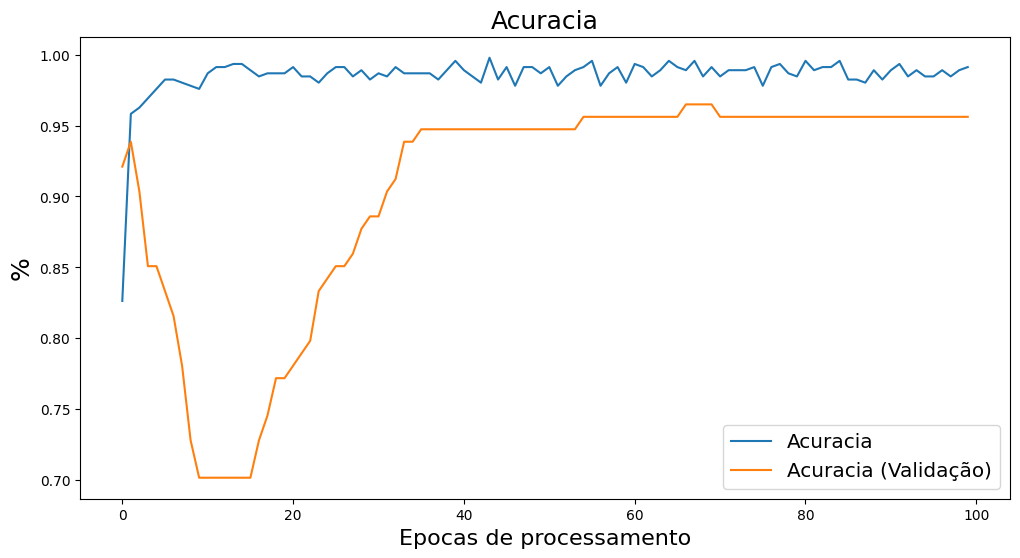

In [31]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
           'Acuracia (Validação)'],
          loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel("%", fontsize = 18)
plt.title('Acuracia', fontsize = 18)
plt.show()

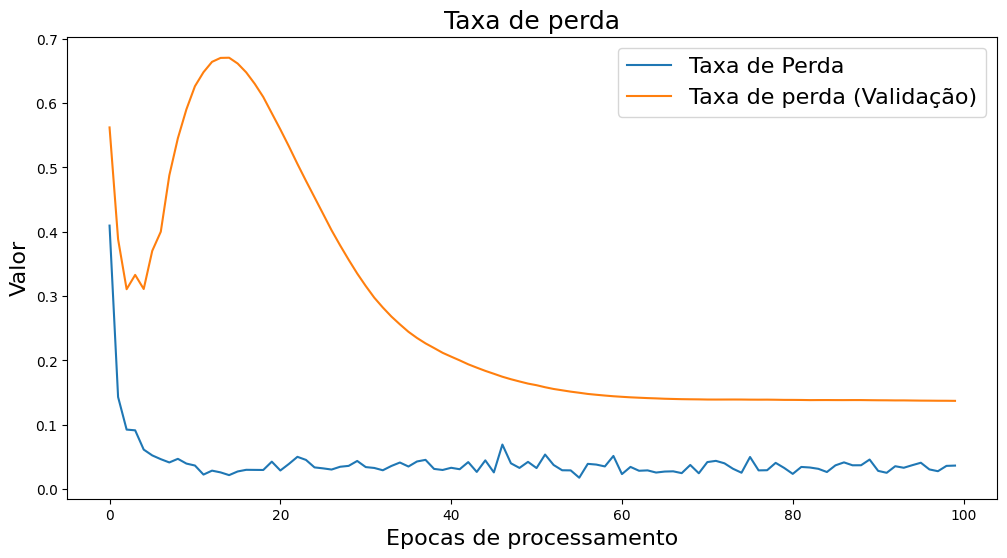

In [32]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
           'Taxa de perda (Validação)'],
          loc = 'upper right', fontsize = 16)
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de perda', fontsize = 18)
plt.show()

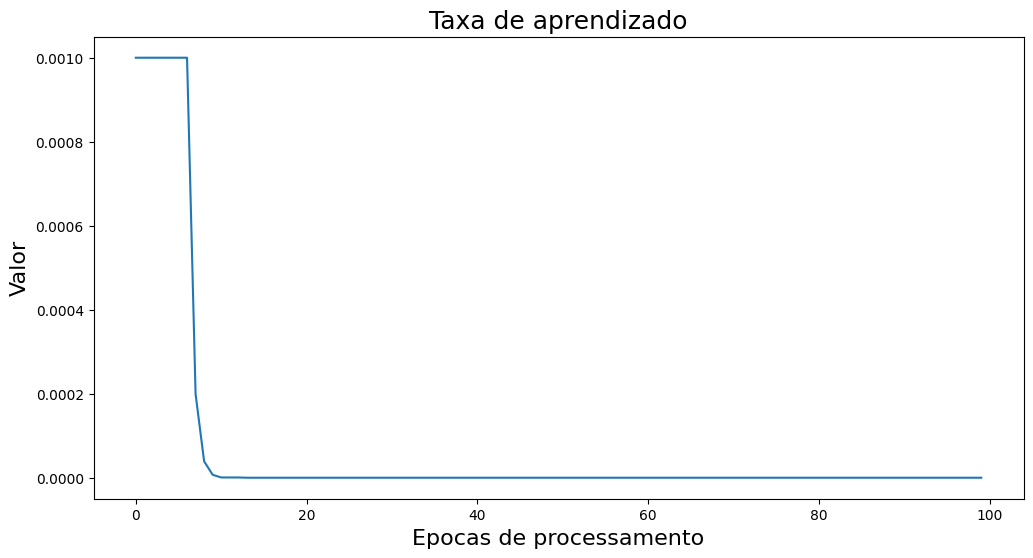

In [33]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['lr'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de aprendizado', fontsize = 18)
plt.show()

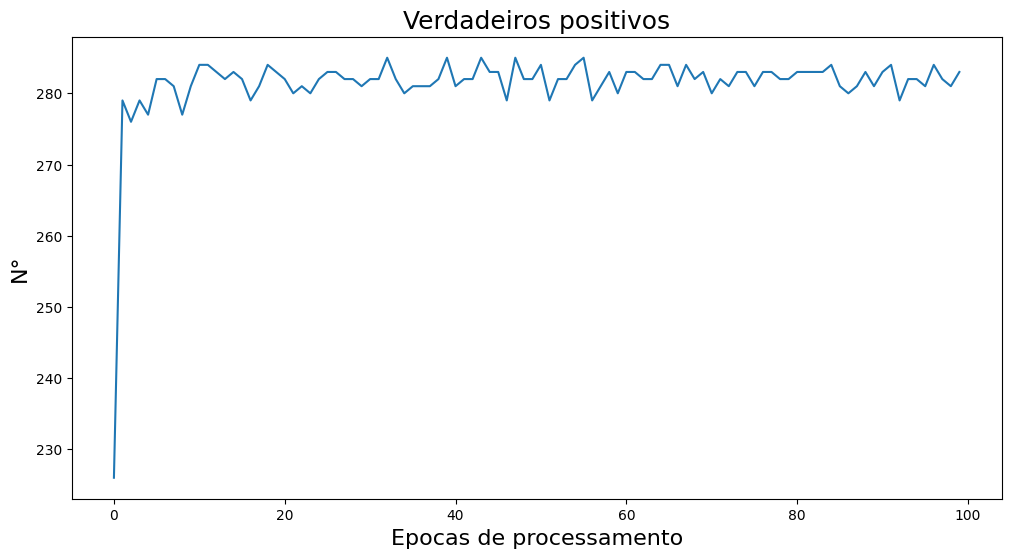

In [34]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Verdadeiros positivos', fontsize = 18)
plt.show()

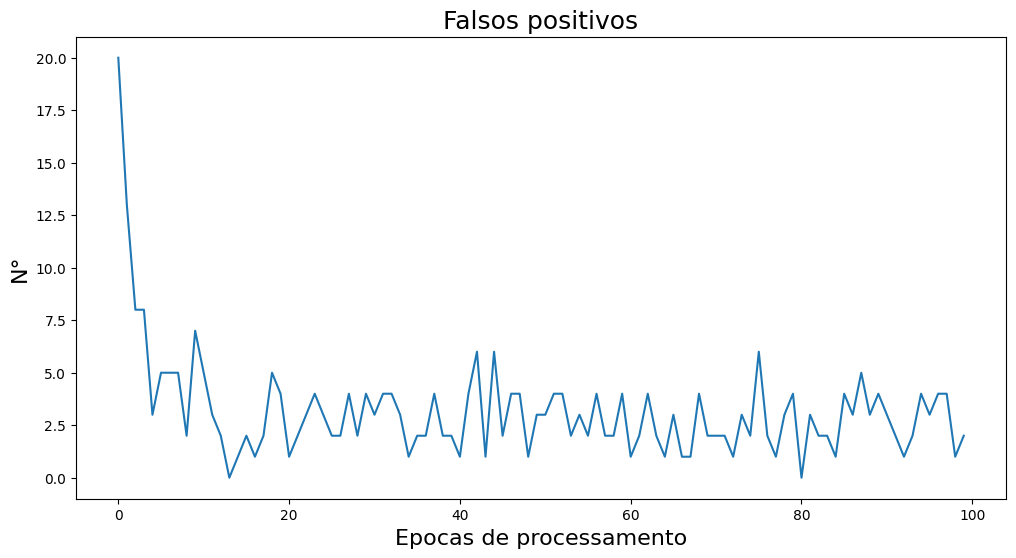

In [35]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Falsos positivos', fontsize = 18)
plt.show()

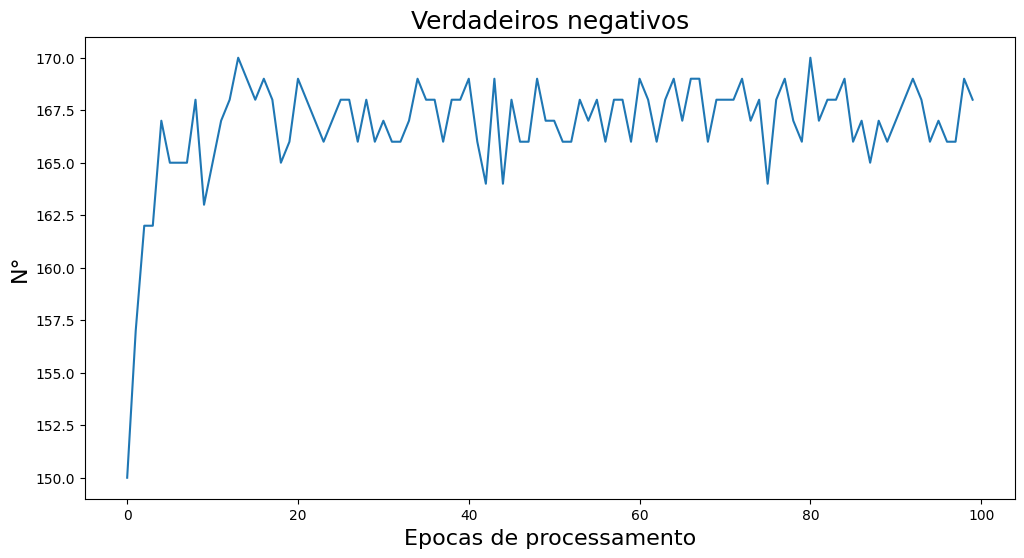

In [36]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Verdadeiros negativos', fontsize = 18)
plt.show()

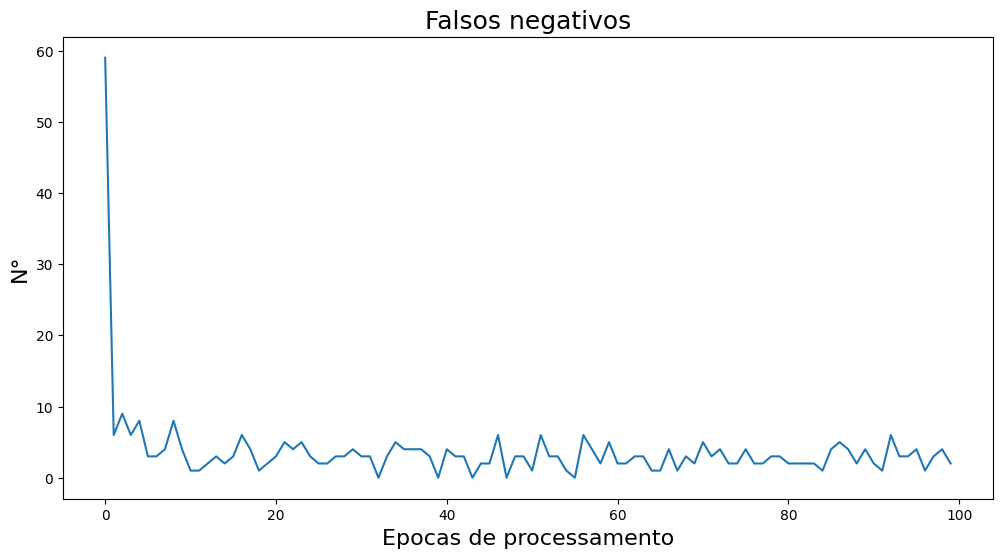

In [37]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Falsos negativos', fontsize = 18)
plt.show()

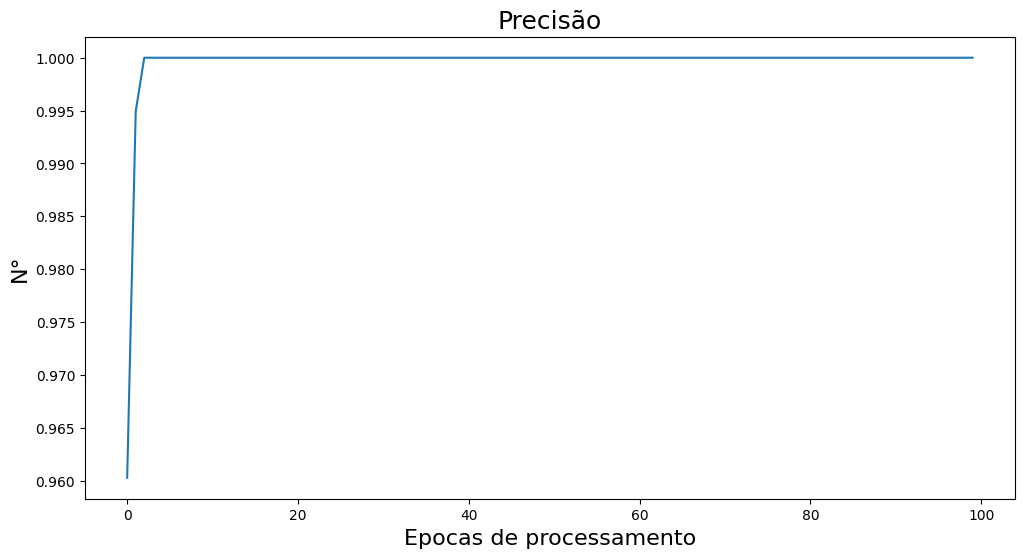

In [38]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()

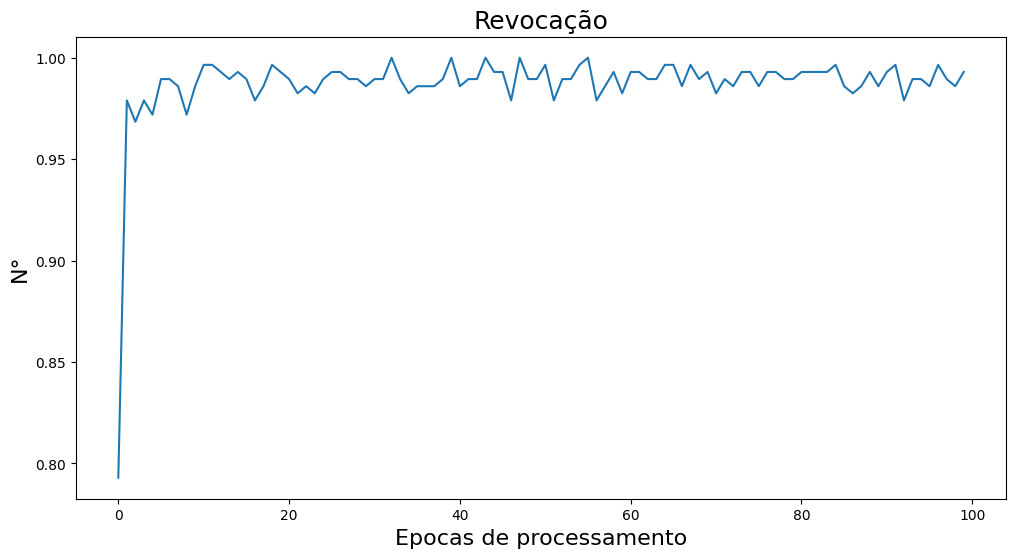

In [39]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Numeros de Positivos e Negativos')

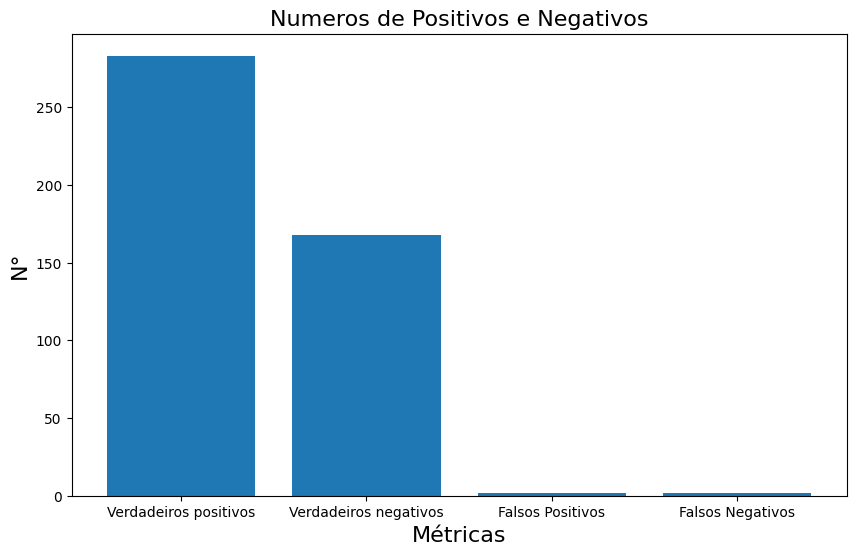

In [40]:
data = {'Verdadeiros positivos': TP,
        'Verdadeiros negativos': TN,
        'Falsos Positivos': FP,
        'Falsos Negativos': FN}
modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10,6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("N°", fontsize = 16)
plt.title("Numeros de Positivos e Negativos", fontsize = 16)

Text(0.5, 1.0, 'Numeros de Positivos e Negativos em %')

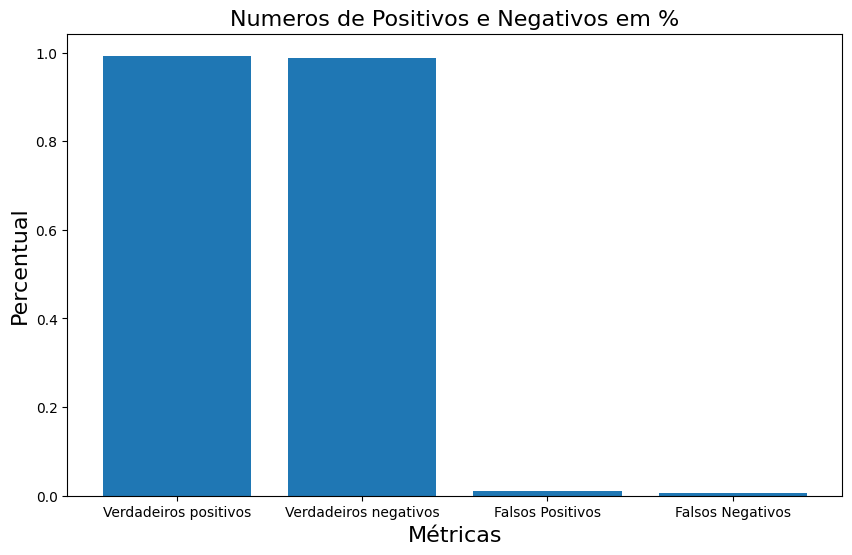

In [41]:
data = {'Verdadeiros positivos': TPR,
        'Verdadeiros negativos': TNR,
        'Falsos Positivos': FPR,
        'Falsos Negativos': FNR}
modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10,6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title("Numeros de Positivos e Negativos em %", fontsize = 16)

Text(0.5, 1.0, 'Métricas de autoavaliação em %')

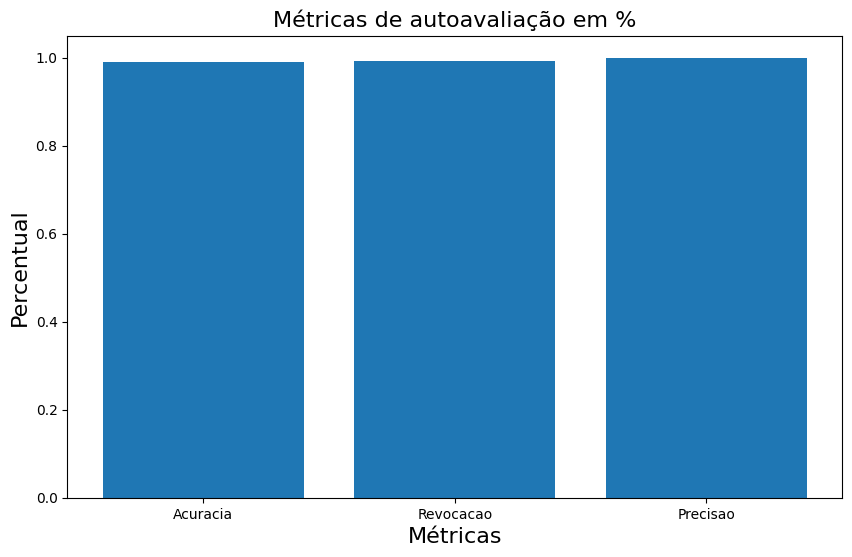

In [42]:
data = {'Acuracia': ACC,
        'Revocacao': REC,
        'Precisao': PRE,}
modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10,6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title("Métricas de autoavaliação em %", fontsize = 16)

Text(0.5, 1.0, 'Taxas de predições positivas e negativas %')

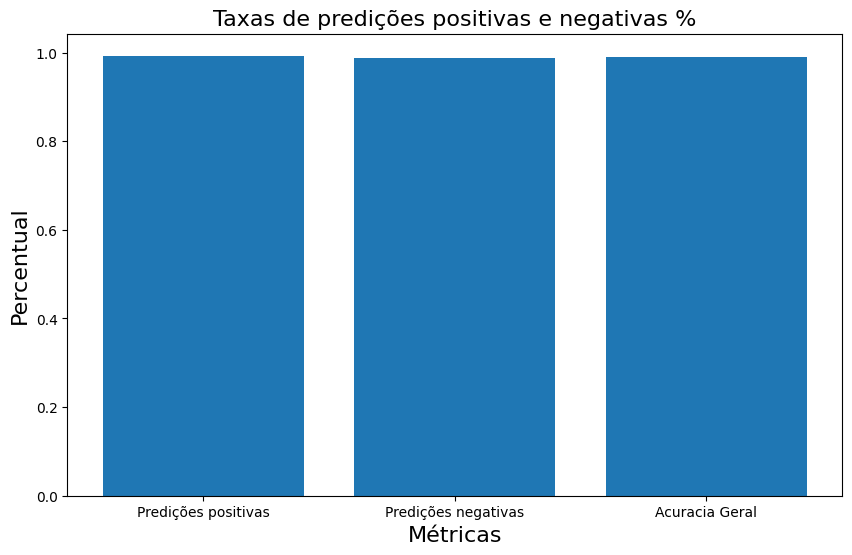

In [43]:
data = {'Predições positivas': PPV,
        'Predições negativas': NPV,
        'Acuracia Geral': OACC,}
modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10,6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title("Taxas de predições positivas e negativas %", fontsize = 16)

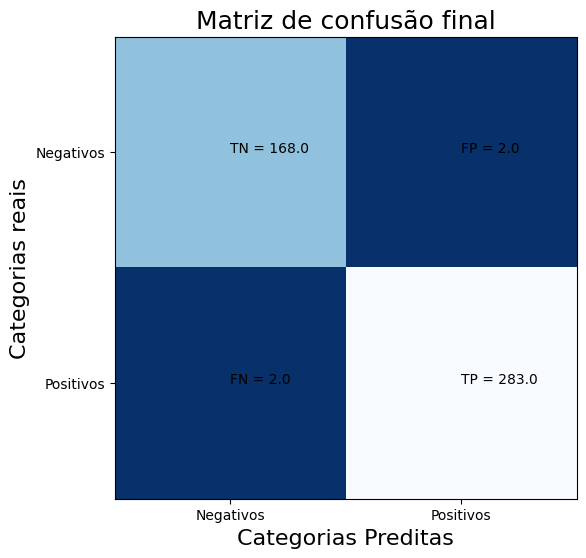

In [44]:
data = [[TN, FP], [FN, TP]]
plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos', 'Positivos']
plt.title('Matriz de confusão final', fontsize = 18)
plt.ylabel('Categorias reais', fontsize = 16)
plt.xlabel('Categorias Preditas', fontsize = 16)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()

In [45]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]
acc_final = hist.history['accuracy'][-1] * 100

In [50]:
print('RELATORIO FINAL (METRICAS DE AUTOAVALIACAO)')
print('--------------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acuracia Geral: {round(OACC, 2)*100-2}%')
print(f'Acuracia Media (Media ultimas 10 epocas): {round(accU10, 2)*100-2}%')
print(f'Acuracia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acuracia (Validação): {round(ACCV, 2)*100-2}%')
print(f'Taxa de perda: {round(LOSS, 2)}%')
print(f'Taxa de perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisao: {round(PRE, 2)*100-2}%')
print(f'Precisao (Validação): {round(OACC, 2)*100-2}%')
print(f'Revocação: {round(REC, 2)*100-2}%')
print(f'Revocação (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100-2}%')
print(f'F-Score: {round(FM, 2)*100-2}%')
print(f'F1 Score(VP, FP, VN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acuracia da Matriz Confusao: {round(ACCCM, 2)*100}%')
print(f'Taxa de verdadeiros positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros negativos: {round(NPV, 2)*100}%')
print(f'Taxa de falsos positivos: {round(FPR, 2)*100}%')
print(f'Taxa de falsos negativos: {round(FNR, 2)*100}%')
print(f'Dados Invalidos: {round(FDR, 2)*100}%')

RELATORIO FINAL (METRICAS DE AUTOAVALIACAO)
--------------------------------------------
Acuracia Final: 97.12%
Acuracia Geral: 97.0%
Acuracia Media (Media ultimas 10 epocas): 97.0%
Acuracia (Treinamento): 97.0%
Acuracia (Validação): 94.0%
Taxa de perda: 0.04%
Taxa de perda (Validação): 0.14%
Precisao: 98.0%
Precisao (Validação): 97.0%
Revocação: 97.0%
Revocação (Validação): 97.0%
F1 Score: 98.0%
F-Score: 98.0%
F1 Score(VP, FP, VN, FN): 97.0%
Taxa de aprendizado: 9.999999974752427e-07
Sensibilidade: 97.0%
Especificidade: 97.0%
Acuracia da Matriz Confusao: 99.0%
Taxa de verdadeiros positivos: 99.0%
Taxa de Verdadeiros negativos: 99.0%
Taxa de falsos positivos: 1.0%
Taxa de falsos negativos: 1.0%
Dados Invalidos: 1.0%


In [47]:
prediction = modelo.predict(X_treino)
print(prediction)

15/15 [==============================] - 0s 5ms/step
[[2.33020098e-03]
 [9.99819160e-01]
 [2.57163038e-07]
 [9.99064922e-01]
 [9.99648750e-01]
 [5.41081245e-04]
 [9.99921858e-01]
 [9.83890474e-01]
 [9.99283493e-01]
 [9.99579549e-01]
 [9.99898434e-01]
 [1.35162860e-01]
 [9.07777131e-01]
 [9.99673784e-01]
 [7.98233692e-03]
 [9.99670208e-01]
 [6.91097812e-04]
 [6.10197958e-06]
 [2.42942259e-01]
 [9.99474764e-01]
 [3.10798030e-04]
 [1.39438043e-06]
 [9.99940515e-01]
 [9.70454275e-05]
 [9.99654114e-01]
 [9.99891877e-01]
 [8.80887383e-04]
 [9.99998569e-01]
 [9.99176800e-01]
 [9.99175727e-01]
 [9.99764621e-01]
 [8.89555514e-01]
 [9.99970973e-01]
 [1.10083931e-06]
 [9.99862731e-01]
 [9.93416548e-01]
 [9.99931037e-01]
 [2.25532787e-07]
 [4.37839814e-02]
 [9.81438160e-01]
 [7.88944380e-05]
 [9.99600291e-01]
 [9.99864936e-01]
 [4.70382511e-04]
 [1.44370347e-06]
 [9.99915719e-01]
 [9.99922156e-01]
 [9.99870777e-01]
 [9.98843849e-01]
 [9.98377144e-01]
 [9.99963880e-01]
 [9.99457061e-01]
 [9.9917304